In [1]:
import pandas as pd
import xgboost

rent = pd.read_csv('rentSelected_plus.csv',sep=";")
rent

,TYPEÁtico,TYPECasa.de.pueblo,TYPECasa.o.chalet.independiente,TYPECasa.rural,TYPECasa.rústica,TYPECasa.terrera,TYPECaserón,TYPECastillo,TYPEChalet,TYPEChalet.adosado,...,ROOMS,AREA,FLOOR,LOCATIONexterior,LOCATIONinterior,ELEVATORFalse,PRICE,GARAGEFALSE,NUM_HOUSES,POPULATION
0,0,0,0,0,0,0,0,0,0,0,...,3,92,3,1,0,0,650,0,512,244700
1,0,0,0,0,0,0,0,0,0,0,...,4,110,3,1,0,0,750,0,512,244700
2,0,0,0,0,0,0,0,0,0,0,...,0,28,0,1,0,0,500,0,512,244700
3,0,0,0,0,0,0,0,0,0,0,...,2,74,1,1,0,1,900,0,512,244700
4,0,0,0,0,0,0,0,0,0,0,...,4,80,4,1,0,0,650,0,512,244700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52476,0,0,0,1,0,0,0,0,0,0,...,9,400,-1,0,0,0,2000,0,13,2136
52477,0,1,0,0,0,0,0,0,0,0,...,3,150,-1,0,0,0,750,1,13,2136
52478,0,0,0,1,0,0,0,0,0,0,...,2,84,-1,0,0,0,400,1,13,2136
52479,0,0,0,0,0,0,0,0,0,0,...,2,102,-1,0,0,0,1000,1,13,2136


In [2]:
sold = pd.read_csv('soldSelected_plus.csv',sep=";")
sold

,TYPEÁtico,TYPECasa.de.pueblo,TYPECasa.o.chalet.independiente,TYPECasa.rural,TYPECasa.rústica,TYPECasa.terrera,TYPECaserón,TYPECastillo,TYPEChalet,TYPEChalet.adosado,...,ROOMS,AREA,FLOOR,LOCATIONexterior,LOCATIONinterior,ELEVATORFalse,PRICE,GARAGEFALSE,NUM_HOUSES,POPULATION
0,0,0,0,0,0,0,0,0,0,0,...,4,116.0,2,1,0,0,185000.0,1,2087,244700
1,0,0,0,0,0,0,0,0,0,0,...,3,88.0,2,1,0,1,120000.0,1,2087,244700
2,0,0,0,0,0,0,0,0,0,0,...,2,75.0,1,1,0,0,149999.0,1,2087,244700
3,0,0,0,0,0,0,0,0,0,0,...,3,90.0,4,1,0,0,235000.0,1,2087,244700
4,0,0,0,0,0,0,0,0,0,0,...,3,100.0,6,1,0,0,169000.0,1,2087,244700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437383,0,0,1,0,0,0,0,0,0,0,...,3,220.0,-1,0,0,0,115000.0,1,101,2136
437384,0,0,0,0,0,0,0,0,0,0,...,4,175.0,-1,0,0,0,225000.0,0,101,2136
437385,0,0,0,0,0,0,0,0,0,0,...,3,130.0,-1,0,0,0,130000.0,0,101,2136
437386,0,0,1,0,0,0,0,0,0,0,...,3,170.0,-1,0,0,0,120000.0,0,101,2136


## Linear regression of rent price

In [2]:
X = rent.drop(['PRICE'],axis=1)
y = rent['PRICE']

Iteration  1
	MSE:  28445276657708.625
	R2:  -7608899.0274040345
Iteration  2
	MSE:  2081569.3974233554
	R2:  0.5105443963816136
Iteration  3
	MSE:  1751144.5729293935
	R2:  0.5871828413034252
Iteration  4
	MSE:  2840226.3126192614
	R2:  0.5153314656679677
Iteration  5
	MSE:  1958381.0617124562
	R2:  0.5421588241975192
Iteration  6
	MSE:  2456879.715696218
	R2:  0.5248586353554399
Iteration  7
	MSE:  1476983.5424945918
	R2:  0.6293684163506305
Iteration  8
	MSE:  1671396.1362154349
	R2:  0.5877990828686466
Iteration  9
	MSE:  1850129.1114941095
	R2:  0.5909777302303152
Iteration  10
	MSE:  1814465.9044312085
	R2:  0.5716421293638267
Mean Squared Error: 2844529455888.4385
R-squared Score: -760889.3967540513
1370.848127707001
0.5762615418474852


<Axes: >

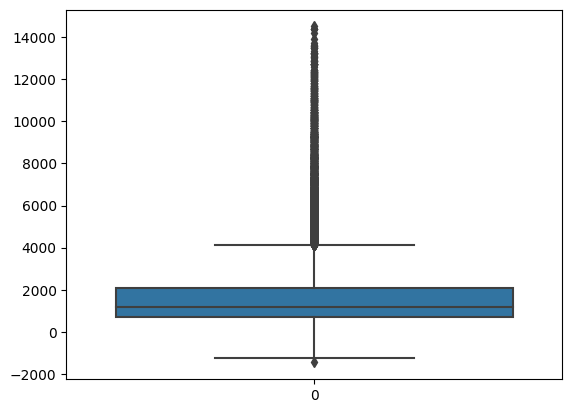

In [140]:
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

# create folds
folds = KFold(n_splits=10, shuffle=True)


model = LinearRegression()
mse_ = []
r2_ = []
tr = []
tst = []
iteration = 1
for train_index, test_index in folds.split(X):
    model = LinearRegression()
    # split data into train and test
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y.loc[train_index]
    y_test = y.loc[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    m = mean_squared_error(y_test, predictions)
    mse_.append(m)
    print("Iteration ",iteration)
    print('\tMSE: ',m)
    r = r2_score(y_test, predictions)
    r2_.append(r)
    print('\tR2: ',r)
    iteration+=1
    if r<0:
        tr.append(train_index)
        tst.append(test_index)



# mean squared error
print('Mean Squared Error:', sum(mse_)/len(mse_))

# R-squared score
print('R-squared Score:', sum(r2_)/len(r2_))

model.fit(X,y)
predictions = model.predict(X)
m = mean_squared_error(y,abs(predictions))
print(math.sqrt(m))
print(r2_score(y,abs(predictions)))



	MSE:  74945069005281.06
	R2:  -17066405.18894991


(array([2385]),)

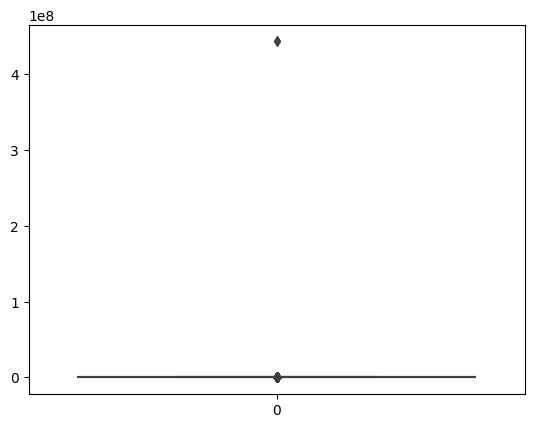

In [137]:
import seaborn as sns
import numpy as np
X_train = X.loc[tr[0]]
X_test = X.loc[tst[0]]
y_train = y.loc[tr[0]]
y_test = y.loc[tst[0]]

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
m = mean_squared_error(y_test, predictions)
print('\tMSE: ',m)
r = r2_score(y_test, predictions)
print('\tR2: ',r)

sns.boxplot(predictions)
predictions = np.array(predictions)
#indx = np.argwhere(predictions>=1e8)
#errore = X_test.iloc[[indx]]
#errore
np.where(predictions>1e5)

In [57]:
abs(-4)

4

In [141]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

model_ridgecv = RidgeCV(cv=10)
model_ridgecv.fit(X_train, y_train)
best_alpha = model_ridgecv.alpha_

print("Best alpha = {}".format(best_alpha))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.81265e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.70987e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.8165e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.8228e-17): result may not be accur

Best alpha = 1.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.99184e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [143]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

# create folds
folds = KFold(n_splits=10, shuffle=True)

model = Ridge(alpha=best_alpha)
mse_ = []
r2_ = []
iteration = 1
for train_index, test_index in folds.split(X):
    # split data into trian and test
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y.loc[train_index]
    y_test = y.loc[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    m = mean_squared_error(y_test, predictions)
    mse_.append(m)
    print("Iteration ",iteration)
    print('\tMSE: ',m)
    r = r2_score(y_test, predictions)
    r2_.append(r)
    print('\tR2: ',r)
    iteration+=1

# mean squared error
print('Mean Squared Error:', sum(mse_)/len(mse_))

# R-squared score
print('R-squared Score:', sum(r2_)/len(r2_))

model.fit(X,y)
predictions = model.predict(X)
m = mean_squared_error(y,abs(predictions))
print(math.sqrt(m))
print(r2_score(y,abs(predictions)))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.00771e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Iteration  1
	MSE:  1745931.984948624
	R2:  0.5439295554950665


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.99769e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Iteration  2
	MSE:  2069487.265351931
	R2:  0.5413716978540375


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.99418e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Iteration  3
	MSE:  1543370.922391672
	R2:  0.595459356542072


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.00112e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Iteration  4
	MSE:  1778660.9042466225
	R2:  0.6062500206830552


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.54354e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Iteration  5
	MSE:  1665460.536892819
	R2:  0.6000862973657868


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.99305e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Iteration  6
	MSE:  1864175.8411515835
	R2:  0.5989300186248397


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.00051e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Iteration  7
	MSE:  2778065.895344427
	R2:  0.4962739686709051


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.00688e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Iteration  8
	MSE:  2472279.068815606
	R2:  0.5282000611981976


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.99343e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Iteration  9
	MSE:  1947941.7612084327
	R2:  0.5552442438026521


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.98996e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Iteration  10
	MSE:  1501020.4396527966
	R2:  0.5959992739651514
Mean Squared Error: 1936639.4620004515
R-squared Score: 0.5661744494201765
1371.265738474105
0.5760033298794307


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.70719e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [144]:
from sklearn.linear_model import LassoCV

model_lassocv = LassoCV(cv=10)
model_lassocv.fit(X_train, y_train)
best_alpha = model_lassocv.alpha_

print("Best alpha = {}".format(best_alpha))

Best alpha = 31139.440519879343


In [145]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

# create folds
folds = KFold(n_splits=10, shuffle=True)

model = Lasso(alpha=best_alpha)
mse_ = []
r2_ = []
iteration = 1
for train_index, test_index in folds.split(X):
    # split data into trian and test
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y.loc[train_index]
    y_test = y.loc[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    m = mean_squared_error(y_test, predictions)
    mse_.append(m)
    print("Iteration ",iteration)
    print('\tMSE: ',m)
    r = r2_score(y_test, predictions)
    r2_.append(r)
    print('\tR2: ',r)
    iteration+=1

# mean squared error
print('Mean Squared Error:', sum(mse_)/len(mse_))

# R-squared score
print('R-squared Score:', sum(r2_)/len(r2_))

Iteration  1
	MSE:  2700964.0243689637
	R2:  0.3943187794466694
Iteration  2
	MSE:  2891918.6813501217
	R2:  0.32270133835982096
Iteration  3
	MSE:  2679102.2148207966
	R2:  0.3953725863307148
Iteration  4
	MSE:  1989256.3265807317
	R2:  0.4896678192677817
Iteration  5
	MSE:  2392044.027973161
	R2:  0.44401774000225
Iteration  6
	MSE:  2602716.2795610516
	R2:  0.4166774489694991
Iteration  7
	MSE:  2819715.867367112
	R2:  0.40845117967927735
Iteration  8
	MSE:  2797925.196760248
	R2:  0.3807443122961697
Iteration  9
	MSE:  2635909.7089896384
	R2:  0.4314726178358752
Iteration  10
	MSE:  2586857.4465913866
	R2:  0.43770845022754146
Mean Squared Error: 2609640.9774363213
R-squared Score: 0.41211322724155997


In [146]:
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
m = mean_squared_error(y, predictions)
print('\tMSE: ',m)
r = r2_score(y, predictions)
print('\tR2: ',r)

	MSE:  1888393.3049457006
	R2:  0.574194126659562


## Regression Tree

In [147]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

# create folds
folds = KFold(n_splits=10, shuffle=True)

model = DecisionTreeRegressor()
mse_ = []
r2_ = []
iteration = 1
for train_index, test_index in folds.split(X):
    # split data into train and test
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y.loc[train_index]
    y_test = y.loc[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    m = mean_squared_error(y_test, predictions)
    mse_.append(m)
    print("Iteration ",iteration)
    print('\tMSE: ',m)
    r = r2_score(y_test, predictions)
    r2_.append(r)
    print('\tR2: ',r)
    iteration+=1

# mean squared error
print('Mean Squared Error:', sum(mse_)/len(mse_))

# R-squared score
print('R-squared Score:', sum(r2_)/len(r2_))

Iteration  1
	MSE:  2056032.526888692
	R2:  0.5455817809211314
Iteration  2
	MSE:  2232528.340058152
	R2:  0.4361582188497116
Iteration  3
	MSE:  2102317.455912619
	R2:  0.45798101408280756
Iteration  4
	MSE:  2510249.6356857666
	R2:  0.5102877030981066
Iteration  5
	MSE:  1898093.6644030686
	R2:  0.54180258095192
Iteration  6
	MSE:  2495528.7934095343
	R2:  0.3570864353417683
Iteration  7
	MSE:  1946037.0660411986
	R2:  0.4797837581098978
Iteration  8
	MSE:  2159582.1767894197
	R2:  0.5448084393365691
Iteration  9
	MSE:  2314429.6853399384
	R2:  0.5239844933698679
Iteration  10
	MSE:  2809367.6352677546
	R2:  0.4874053662949185
Mean Squared Error: 2252416.697979614
R-squared Score: 0.4884879790356699


## RandomForestRegressor

In [148]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

# create folds
folds = KFold(n_splits=10, shuffle=True)

model = RandomForestRegressor()
mse_ = []
r2_ = []
iteration = 1
for train_index, test_index in folds.split(X):
    # split data into trian and test
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y.loc[train_index]
    y_test = y.loc[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    m = mean_squared_error(y_test, predictions)
    mse_.append(m)
    print("Iteration ",iteration)
    print('\tMSE: ',m)
    r = r2_score(y_test, predictions)
    r2_.append(r)
    print('\tR2: ',r)
    iteration+=1

# mean squared error
print('Mean Squared Error:', sum(mse_)/len(mse_))

# R-squared score
print('R-squared Score:', sum(r2_)/len(r2_))

Iteration  1
	MSE:  1033513.2664884796
	R2:  0.7399127295310178
Iteration  2
	MSE:  1621106.744281851
	R2:  0.6591193533010653
Iteration  3
	MSE:  1373769.612679678
	R2:  0.6638996980243894
Iteration  4
	MSE:  1953670.3157902353
	R2:  0.6482611288477151
Iteration  5
	MSE:  1325832.9781504564
	R2:  0.7019286773815678
Iteration  6
	MSE:  1196566.7953387278
	R2:  0.701866756800104
Iteration  7
	MSE:  1055545.0167267043
	R2:  0.7313247494016641
Iteration  8
	MSE:  1599415.8222912753
	R2:  0.6714427645558301
Iteration  9
	MSE:  1574244.067243679
	R2:  0.6415867750139541
Iteration  10
	MSE:  1500506.4715817492
	R2:  0.6525025369341125
Mean Squared Error: 1423417.1090572835
R-squared Score: 0.6811845169791421


Iteration  1
	MSE:  1345855.9491598026
	R2:  0.6873227875677719
Iteration  2
	MSE:  1294075.9037196534
	R2:  0.7074931218991094
Iteration  3
	MSE:  1016892.274244579
	R2:  0.696907785667547
Iteration  4
	MSE:  1640372.3732908966
	R2:  0.6468762840745473
Iteration  5
	MSE:  1377585.8276442722
	R2:  0.6379468025216364
Iteration  6
	MSE:  1512860.06283477
	R2:  0.6499476874813862
Iteration  7
	MSE:  1277238.3879103253
	R2:  0.7277488394441106
Iteration  8
	MSE:  1427578.4585652233
	R2:  0.6754423506031204
Iteration  9
	MSE:  2349743.117600247
	R2:  0.630216639356857
Iteration  10
	MSE:  1083460.360696806
	R2:  0.7585117114849722
    
Mean Squared Error: 1432566.2715666576
R-squared Score: 0.6818414010101058

## XGBoost

In [149]:
X = rent.drop(['PRICE'],axis=1)
y = rent['PRICE']

from sklearn.model_selection import train_test_split

# Assuming x and y are your input and target variables, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [150]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.05, max_depth = 7, alpha = 1, n_estimators = 500)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("MSE: %f" % (mean_squared_error(y_test, preds)))
# R-squared score
r2 = r2_score(y_test, preds)
print('R-squared Score:', r2)

MSE: 1219834.052799
R-squared Score: 0.7421015313762216


In [72]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.05, max_depth = 5, reg_lambda = 0.5, n_estimators = 1000, use_rmm=True)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
# R-squared score
r2 = r2_score(y_test, preds)
print('R-squared Score:', r2)

RMSE: 1263.027566
R-squared Score: 0.6667916114308984


In [151]:
mse_ = []
r2_ = []
iteration = 1
for train_index, test_index in folds.split(X):
    model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.05, max_depth = 7, reg_lambda = 1, n_estimators = 500, use_rmm=True)

    # split data into trian and test
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y.loc[train_index]
    y_test = y.loc[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    m = mean_squared_error(y_test, predictions)
    mse_.append(m)
    print("Iteration ",iteration)
    print('\tMSE: ',m)
    r = r2_score(y_test, predictions)
    r2_.append(r)
    print('\tR2: ',r)
    iteration+=1

# mean squared error
print('Mean Squared Error:', sum(mse_)/len(mse_))

# R-squared score
print('R-squared Score:', sum(r2_)/len(r2_))

Iteration  1
	MSE:  1088434.2465143856
	R2:  0.7236365504162592
Iteration  2
	MSE:  1241269.8127034688
	R2:  0.7194815066928155
Iteration  3
	MSE:  1750806.9666843102
	R2:  0.672899215395776
Iteration  4
	MSE:  1428992.3594805438
	R2:  0.6487276779223348
Iteration  5
	MSE:  1561605.5740321458
	R2:  0.6788572352173796
Iteration  6
	MSE:  831502.7875081609
	R2:  0.7424485740747802
Iteration  7
	MSE:  1305070.3525276615
	R2:  0.7341012844775224
Iteration  8
	MSE:  1529912.366916839
	R2:  0.6965184219589157
Iteration  9
	MSE:  1031231.4356472606
	R2:  0.7479262525991088
Iteration  10
	MSE:  1355300.5381685433
	R2:  0.6938015781272482
Mean Squared Error: 1312412.644018332
R-squared Score: 0.705839829688214


<Axes: >

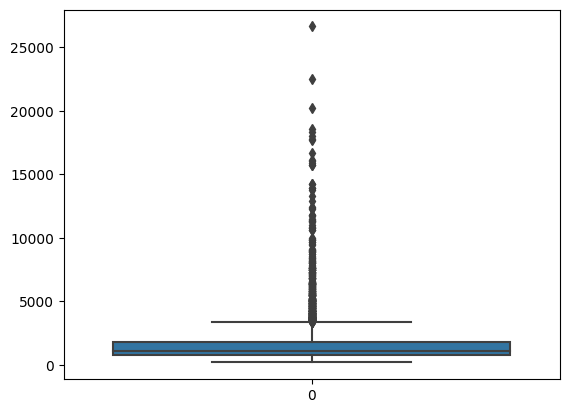

In [152]:
sns.boxplot(predictions)

In [19]:
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

provinceCheck = pd.read_csv('dataPre.csv', encoding='utf-8',sep=";")

X_ = X.loc[provinceCheck.index[list(provinceCheck['PROVINCE'] == 'Madrid')],]
y_ = y.loc[provinceCheck.index[list(provinceCheck['PROVINCE'] == 'Madrid')],]

X_=X_.reset_index()
X_=X_.drop(['index'],axis=1)
y_=y_.reset_index()
y_=y_.drop(['index'],axis=1)

mse_ = []
r2_ = []
iteration = 1
folds = KFold(n_splits=10, shuffle=True)
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.05, max_depth = 7, reg_lambda = 1, n_estimators = 1000, use_rmm=True)
for train_index, test_index in folds.split(X_):
    # split data into trian and test
    X_train = X_.loc[train_index]
    X_test = X_.loc[test_index]
    y_train = y_.loc[train_index]
    y_test = y_.loc[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    m = mean_squared_error(y_test, predictions)
    mse_.append(m)
    print("Iteration ",iteration)
    print('\tMSE: ',m)
    r = r2_score(y_test, predictions)
    r2_.append(r)
    print('\tR2: ',r)
    iteration+=1

# mean squared error
print('Mean Squared Error:', sum(mse_)/len(mse_))

# R-squared score
print('R-squared Score:', sum(r2_)/len(r2_))

Iteration  1
	MSE:  703702.8653548456
	R2:  0.6933293332829291
Iteration  2
	MSE:  694217.814556606
	R2:  0.7058252196147774
Iteration  3
	MSE:  653378.8131386852
	R2:  0.7478186207498022
Iteration  4
	MSE:  676381.3283411846
	R2:  0.6712812450926116
Iteration  5
	MSE:  540955.3404997586
	R2:  0.7330969601916038
Iteration  6
	MSE:  576845.3474491119
	R2:  0.7315780253141293
Iteration  7
	MSE:  628781.56754803
	R2:  0.7101760883460195
Iteration  8
	MSE:  798284.977134763
	R2:  0.7165647890550394
Iteration  9
	MSE:  584725.1076853456
	R2:  0.7370277658656903
Iteration  10
	MSE:  597840.2329306799
	R2:  0.72367066392311
Mean Squared Error: 645511.339463901
R-squared Score: 0.7170368711435712


In [75]:
model.fit(X, y)
predictions = model.predict(X)
m = mean_squared_error(y, predictions)
print('\tMSE: ',m)
r = r2_score(y, predictions)
print('\tR2: ',r)

	MSE:  805994.9653527008
	R2:  0.8180377831820214


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


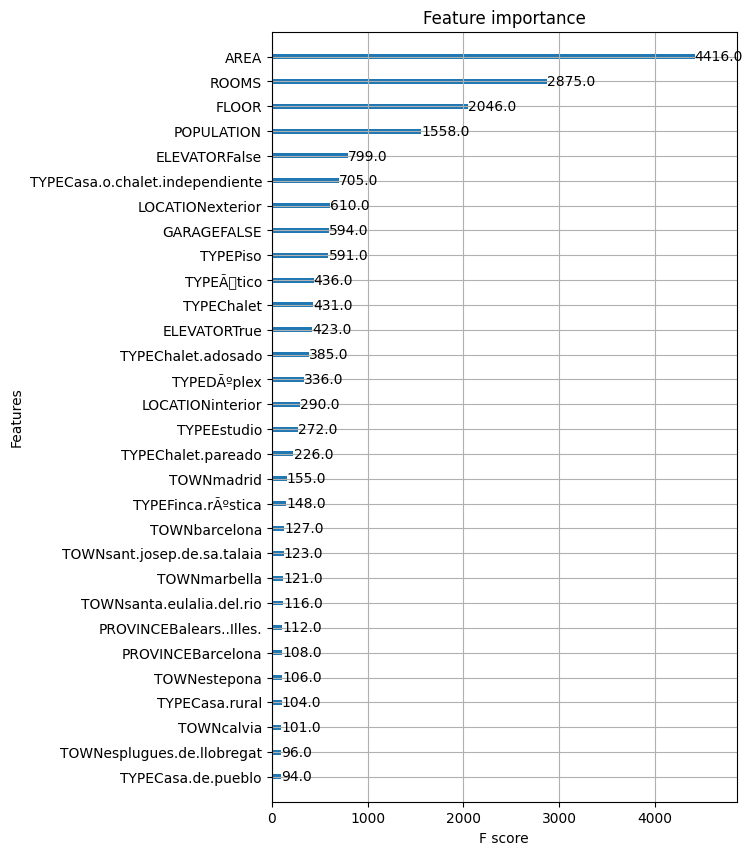

In [76]:
import xgboost
from matplotlib.pyplot import figure

ax = xgboost.plot_importance(model,max_num_features=30, importance_type="weight")
fig = ax.figure
fig.set_size_inches(6, 10)

	MSE:  321878.6163704476
	R2:  0.9226625764326091


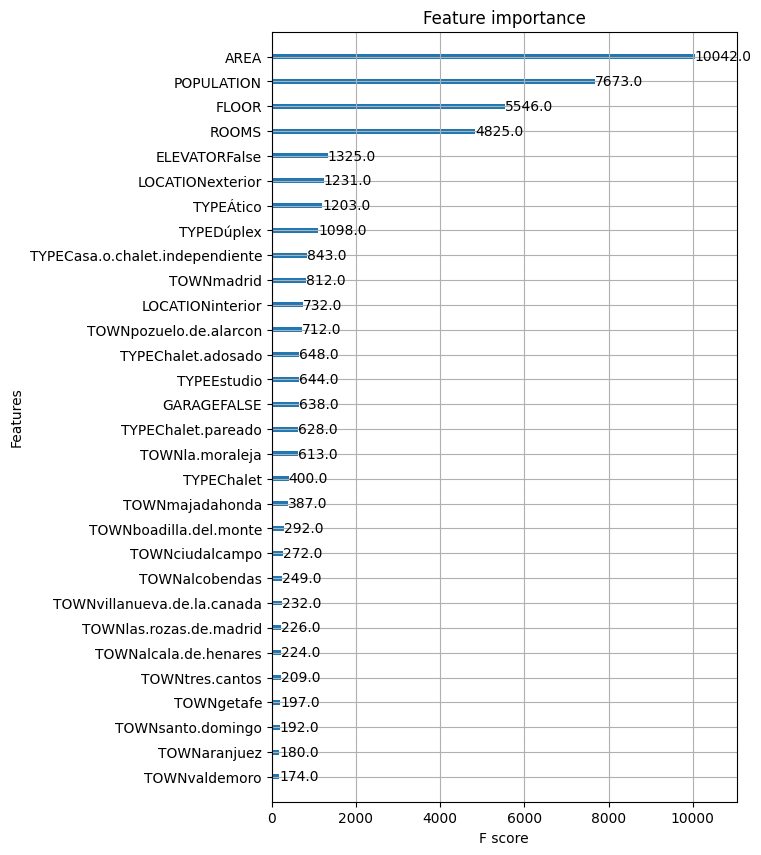

In [47]:
model.fit(X_, y_)
predictions = model.predict(X_)
m = mean_squared_error(y_, predictions)
print('\tMSE: ', m)
r = r2_score(y_, predictions)
print('\tR2: ', r)
ax = xgboost.plot_importance(model,max_num_features=30, importance_type="weight")
fig = ax.figure
fig.set_size_inches(6, 10)

In [38]:
provinceCheck = pd.read_csv('dataPre.csv', encoding='utf-8',sep=";")

In [54]:
X.loc[provinceCheck.index[list(provinceCheck['PROVINCE'] == 'Madrid')],]

KeyError: 'PROVINCE'

In [17]:
provinceCheck = pd.read_csv('dataPre.csv', encoding='utf-8',sep=";")

X_ = X.loc[provinceCheck.index[list(provinceCheck['PROVINCE'] == 'Madrid')],]
y_ = y.loc[provinceCheck.index[list(provinceCheck['PROVINCE'] == 'Madrid')],]

X_=X_.reset_index()
X_=X_.drop(['index'],axis=1)
y_=y_.reset_index()
y_=y_.drop(['index'],axis=1)

y_

,PRICE
0,815
1,795
2,850
3,1025
4,750
...,...
10665,3500
10666,12000
10667,1450
10668,1200


### Neural Network

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
#print("Number of GPUs available: ",len(tf.config.list_physical_devices('GPU')))

In [4]:
X = rent.drop(['PRICE'],axis=1)
y = rent['PRICE']
X = X.drop(columns = rent.columns.difference(sold.columns))
#provinceCheck = pd.read_csv('dataPre.csv', encoding='utf-8',sep=";")
#X = X.loc[provinceCheck.index[list(provinceCheck['PROVINCE'] == 'Madrid')],]
#y = y.loc[provinceCheck.index[list(provinceCheck['PROVINCE'] == 'Madrid')],]

In [5]:
mean_price = np.mean(y)
sd_price = np.std(y)
y=(y-np.mean(y))/np.std(y)

In [6]:
print(mean_price)
print(sd_price)

1644.3476496255787
2105.9128869641795


In [7]:
import pickle
with open('normalization.pkl', 'wb') as outp:
    pickle.dump(mean_price, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(sd_price, outp, pickle.HIGHEST_PROTOCOL)

del mean_price
del sd_price

with open('normalization.pkl', 'rb') as inp:
    mean_price = pickle.load(inp)
    print(mean_price)
    sd_price = pickle.load(inp)
    print(sd_price)

1644.3476496255787
2105.9128869641795


In [8]:
X['AREA'] = (X['AREA'] - np.mean(X['AREA']))/np.std(X['AREA'])
X['ROOMS'] = (X['ROOMS'] - np.mean(X['ROOMS']))/np.std(X['ROOMS'])
X['FLOOR'] = (X['FLOOR'] - np.mean(X['FLOOR']))/np.std(X['FLOOR'])
X['POPULATION'] = (X['POPULATION'] - np.mean(X['POPULATION']))/np.std(X['POPULATION'])
X['NUM_HOUSES'] = (X['NUM_HOUSES'] - np.mean(X['NUM_HOUSES']))/np.std(X['NUM_HOUSES'])


# ROOMS; AREA; FLOOR; POPULATION

In [9]:
print(X.shape[1])

499


In [10]:
X['NUM_HOUSES']

0       -0.525971
1       -0.525971
2       -0.525971
3       -0.525971
4       -0.525971
           ...   
52476   -0.689324
52477   -0.689324
52478   -0.689324
52479   -0.689324
52480   -0.689324
Name: NUM_HOUSES, Length: 52481, dtype: float64

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

mses = []
rs = []
folds = KFold(n_splits=10, shuffle=True)
for train_index, test_index in folds.split(X):
    # split data into trian and test
    X_train = X.loc[train_index]
    X_val = X.loc[test_index]
    y_train = y.loc[train_index]
    y_val = y.loc[test_index]



#Define the model
    model = keras.Sequential([
        keras.layers.Dense(200, activation='relu', input_shape=(X.shape[1],)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(5, activation='relu'),
        #keras.layers.Dense(5, activation='relu'),
        keras.layers.Dense(1, activation='linear')
    ])

    #Compile the model
    model.compile(loss="mse", optimizer='adam', metrics=['mse'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    # Create a ModelCheckpoint callback
    checkpoint_filepath = "best_weights_v2.h5"
    model_checkpoint = ModelCheckpoint(
        filepath=checkpoint_filepath,
        monitor='val_loss',
        mode='min',
        save_best_only=True,
        save_weights_only=True,
        verbose=1
    )

    callbacks = [early_stopping, model_checkpoint]

    model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=200, callbacks=[callbacks], batch_size = 128)
    predictions = model.predict(X_val)
    m = mean_squared_error((y_val*sd_price)+mean_price, (predictions*sd_price)+mean_price)
    mses.append(m)
    r = r2_score(y_val, predictions)
    rs.append(r)


print('\tMSE: ', np.mean(mses))
print('\tR2: ', np.mean(rs))

Epoch 1/200
329/369 [=========================>....] - ETA: 0s - loss: 0.5031 - mse: 0.5031
Epoch 1: val_loss improved from inf to 0.35303, saving model to best_weights_v2.h5
369/369 [==============================] - 1s 1ms/step - loss: 0.4965 - mse: 0.4965 - val_loss: 0.3530 - val_mse: 0.3530
Epoch 2/200
358/369 [============================>.] - ETA: 0s - loss: 0.3821 - mse: 0.3821
Epoch 2: val_loss improved from 0.35303 to 0.29917, saving model to best_weights_v2.h5
369/369 [==============================] - 1s 3ms/step - loss: 0.3841 - mse: 0.3841 - val_loss: 0.2992 - val_mse: 0.2992
Epoch 3/200
361/369 [============================>.] - ETA: 0s - loss: 0.3529 - mse: 0.3529
Epoch 3: val_loss improved from 0.29917 to 0.28121, saving model to best_weights_v2.h5
369/369 [==============================] - 1s 1ms/step - loss: 0.3525 - mse: 0.3525 - val_loss: 0.2812 - val_mse: 0.2812
Epoch 4/200
352/369 [===========================>..] - ETA: 0s - loss: 0.3387 - mse: 0.3387
Epoch 4: val

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

folds = KFold(n_splits=10, shuffle=True)

for train_index, test_index in folds.split(X):
    # split data into trian and test
    X_train = X.loc[train_index]
    X_val = X.loc[test_index]
    y_train = y.loc[train_index]
    y_val = y.loc[test_index]

model = keras.Sequential([
    keras.layers.Dense(200, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5, activation='relu'),
    #keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

#Compile the model
model.compile(loss="mse", optimizer='adam', metrics=['mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Create a ModelCheckpoint callback
checkpoint_filepath = "best_weights_v2.h5"
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

callbacks = [early_stopping, model_checkpoint]

model.fit(x=X, y=y, validation_data=(X_val, y_val), epochs=200, callbacks=[callbacks], batch_size = 128)

Epoch 1/200
374/411 [==========================>...] - ETA: 0s - loss: 0.4829 - mse: 0.4829
Epoch 1: val_loss improved from inf to 0.34732, saving model to best_weights_v2.h5
411/411 [==============================] - 1s 1ms/step - loss: 0.4757 - mse: 0.4757 - val_loss: 0.3473 - val_mse: 0.3473
Epoch 2/200
384/411 [===========================>..] - ETA: 0s - loss: 0.3756 - mse: 0.3756
Epoch 2: val_loss improved from 0.34732 to 0.28542, saving model to best_weights_v2.h5
411/411 [==============================] - 0s 1ms/step - loss: 0.3737 - mse: 0.3737 - val_loss: 0.2854 - val_mse: 0.2854
Epoch 3/200
390/411 [===========================>..] - ETA: 0s - loss: 0.3425 - mse: 0.3425
Epoch 3: val_loss improved from 0.28542 to 0.26712, saving model to best_weights_v2.h5
411/411 [==============================] - 1s 1ms/step - loss: 0.3403 - mse: 0.3403 - val_loss: 0.2671 - val_mse: 0.2671
Epoch 4/200
401/411 [============================>.] - ETA: 0s - loss: 0.3334 - mse: 0.3334
Epoch 4: val

In [17]:
model.save('NN Model')

INFO:tensorflow:Assets written to: NN Model/assets


INFO:tensorflow:Assets written to: NN Model/assets


In [13]:
predictions=model.predict(X)

1641/1641 [==============================] - 1s 356us/step


In [14]:
from sklearn.metrics import mean_squared_error, r2_score
m = mean_squared_error(y, predictions)
print('\tMSE: ', m)
r = r2_score(y, predictions)
print('\tR2: ', r)

	MSE:  0.20687995507053605
	R2:  0.7931200449294639


In [11]:
print(model)

In [15]:
sold_X = sold.drop(['PRICE'],axis=1)
sold_y = sold['PRICE']
sold_X = sold_X.drop(columns = sold_X.columns.difference(X.columns))

sold_X['AREA'] = (sold_X['AREA'] - np.mean(sold_X['AREA']))/np.std(sold_X['AREA'])
sold_X['ROOMS'] = (sold_X['ROOMS'] - np.mean(sold_X['ROOMS']))/np.std(sold_X['ROOMS'])
sold_X['FLOOR'] = (sold_X['FLOOR'] - np.mean(sold_X['FLOOR']))/np.std(sold_X['FLOOR'])
sold_X['POPULATION'] = (sold_X['POPULATION'] - np.mean(sold_X['POPULATION']))/np.std(sold_X['POPULATION'])
sold_X['NUM_HOUSES'] = (sold_X['NUM_HOUSES'] - np.mean(sold_X['NUM_HOUSES']))/np.std(sold_X['NUM_HOUSES'])

In [16]:
rent.columns.difference(sold.columns)

Index([], dtype='object')

In [13]:
model = keras.Sequential([
    keras.layers.Dense(200, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5, activation='relu'),
    #keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])
model.load_weights("/Users/manzanero/Documents/Documents - Alfie’s MacBook Pro/Analisis TFG/final_weights_regularization.h5")

In [17]:
predicted_price = model.predict(sold_X)

13669/13669 [==============================] - 5s 375us/step


In [18]:
predicted_price.shape

(437388, 1)

In [19]:
predicted_price = (predicted_price*sd_price)+mean_price

In [20]:
predicted_price

array([[987.6047 ],
       [845.2231 ],
       [899.7017 ],
       ...,
       [777.3998 ],
       [837.3502 ],
       [698.83057]], dtype=float32)

<Axes: >

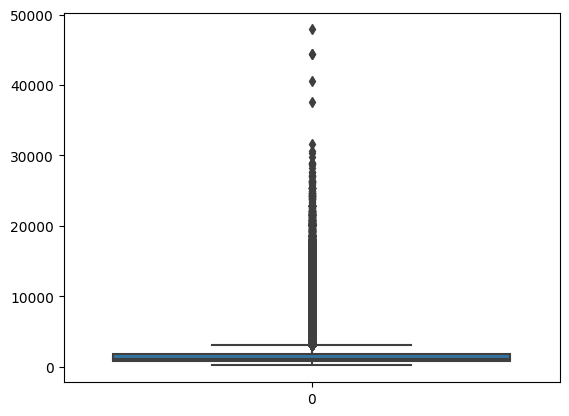

In [22]:
import seaborn as sns
sns.boxplot(predicted_price)

In [33]:
sold_predicted = sold.copy(deep=True)

In [35]:
sold_predicted['RENT_PRICE']=predicted_price

In [37]:
sold_predicted['ROI'] = sold_predicted['RENT_PRICE']*12 / sold_predicted['PRICE']

In [38]:
sold_predicted

,TYPEÁtico,TYPECasa.de.pueblo,TYPECasa.o.chalet.independiente,TYPECasa.rural,TYPECasa.rústica,TYPECasa.terrera,TYPECaserón,TYPECastillo,TYPEChalet,TYPEChalet.adosado,...,FLOOR,LOCATIONexterior,LOCATIONinterior,ELEVATORFalse,PRICE,GARAGEFALSE,NUM_HOUSES,POPULATION,RENT_PRICE,ROI
0,0,0,0,0,0,0,0,0,0,0,...,2,1,0,0,185000.0,1,2087,244700,987.604675,0.064061
1,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,120000.0,1,2087,244700,845.223083,0.084522
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,149999.0,1,2087,244700,899.701721,0.071977
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,235000.0,1,2087,244700,943.942749,0.048201
4,0,0,0,0,0,0,0,0,0,0,...,6,1,0,0,169000.0,1,2087,244700,1058.209717,0.075139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437383,0,0,1,0,0,0,0,0,0,0,...,-1,0,0,0,115000.0,1,101,2136,785.287231,0.081943
437384,0,0,0,0,0,0,0,0,0,0,...,-1,0,0,0,225000.0,0,101,2136,898.869629,0.047940
437385,0,0,0,0,0,0,0,0,0,0,...,-1,0,0,0,130000.0,0,101,2136,777.399780,0.071760
437386,0,0,1,0,0,0,0,0,0,0,...,-1,0,0,0,120000.0,0,101,2136,837.350220,0.083735


#### Linear Regression

In [40]:
X = sold_predicted.drop(['ROI','RENT_PRICE','PRICE'],axis=1)
y = sold_predicted['ROI']
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold




model = LinearRegression()


model.fit(X, y)
predictions = model.predict(X)
m = mean_squared_error(y, predictions)

r = r2_score(y, predictions)




# mean squared error
print('Mean Squared Error:', m)

# R-squared score
print('R-squared Score:', r)


Mean Squared Error: 0.002420326127184352
R-squared Score: 0.28447327603475636


#### Ridge

In [42]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

model_ridgecv = RidgeCV(cv=10)
model_ridgecv.fit(X_train, y_train)
best_alpha = model_ridgecv.alpha_
print("Best alpha:",best_alpha)

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold


model = Ridge(alpha=best_alpha)
model.fit(X, y)
predictions = model.predict(X)
m = mean_squared_error(y, predictions)

r = r2_score(y, predictions)




# mean squared error
print('Mean Squared Error:', m)

# R-squared score
print('R-squared Score:', r)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.19917e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.18515e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.16138e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.19861e-19): result may not be acc

Best alpha: 0.1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.19886e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Mean Squared Error: 0.0024203462558536983
R-squared Score: 0.284467325348742


#### Lasso

In [43]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

model_lassocv = LassoCV(cv=10)
model_lassocv.fit(X_train, y_train)
best_alpha = model_lassocv.alpha_
print("Best alpha:",best_alpha)

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold


model = Lasso(alpha=best_alpha)
model.fit(X, y)
predictions = model.predict(X)
m = mean_squared_error(y, predictions)

r = r2_score(y, predictions)




# mean squared error
print('Mean Squared Error:', m)

# R-squared score
print('R-squared Score:', r)


Best alpha: 2.1522124461759717
Mean Squared Error: 0.003374018215162697
R-squared Score: 0.0025310337400915595


#### Regression Tree

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import KFold


model = DecisionTreeRegressor()
model.fit(X, y)
predictions = model.predict(X)
m = mean_squared_error(y, predictions)

r = r2_score(y, predictions)




# mean squared error
print('Mean Squared Error:', m)

# R-squared score
print('R-squared Score:', r)


Mean Squared Error: 9.995550206712514e-05
R-squared Score: 0.9704499190695455


In [82]:
order = np.argsort(model.feature_importances_)[::-1]
np.array(list(X))[order]

array(['AREA', 'POPULATION', 'NUM_HOUSES', 'GARAGEFALSE', 'ROOMS',
       'FLOOR', 'LOCATIONexterior', 'ELEVATORFalse', 'PROVINCEValencia',
       'TYPECasa.de.pueblo', 'TYPEChalet',
       'TYPECasa.o.chalet.independiente', 'LOCATIONinterior',
       'TYPEFinca.rústica', 'TOWNontinyent', 'TYPEChalet.adosado',
       'PROVINCEOurense', 'TOWNchiclana.de.la.frontera',
       'TOWNmieres.del.camino', 'TOWNrequena', 'TOWNalzira',
       'TYPEChalet.pareado', 'TOWNlangreo', 'TYPEÁtico',
       'PROVINCEBizkaia', 'TOWNel.ejido', 'TOWNalicante.alacant',
       'TOWNsan.javier', 'TOWNferrol', 'TOWNpals', 'TOWNbegur',
       'PROVINCETeruel', 'TOWNlaredo', 'TYPEDúplex', 'TOWNoviedo',
       'TOWNtavernes.de.la.valldigna', 'TOWNcrevillente', 'TOWNpego',
       'TOWNjerez.de.la.frontera', 'TOWNalmeria', 'TYPECasa.rural',
       'TOWNalgeciras', 'TOWNcalatayud', 'TOWNaller', 'TOWNmazarron',
       'PROVINCELeón', 'PROVINCELleida', 'TOWNciutadella.de.menorca',
       'TOWNalcoy.alcoi', 'TOWNsevilla

#### Random Forest Regression

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


model = RandomForestRegressor()
model.fit(X, y)
predictions = model.predict(X)
m = mean_squared_error(y, predictions)

r = r2_score(y, predictions)




# mean squared error
print('Mean Squared Error:', m)

# R-squared score
print('R-squared Score:', r)

Mean Squared Error: 0.000313725905756808
R-squared Score: 0.9072524702155151


In [64]:
import xgboost as xgb
model_overfit = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.05, max_depth = 40, reg_lambda = 0, n_estimators = 100, use_rmm=True)
model_overfit.fit(sold_predicted.drop(['ROI','RENT_PRICE','PRICE'],axis=1),sold_predicted['ROI'])


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=40, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [65]:
predictions = model_overfit.predict(X)
m = mean_squared_error(y, predictions)

r = r2_score(y, predictions)




# mean squared error
print('Mean Squared Error:', m)

# R-squared score
print('R-squared Score:', r)

Mean Squared Error: 0.00011715316374190919
R-squared Score: 0.9653657337691388


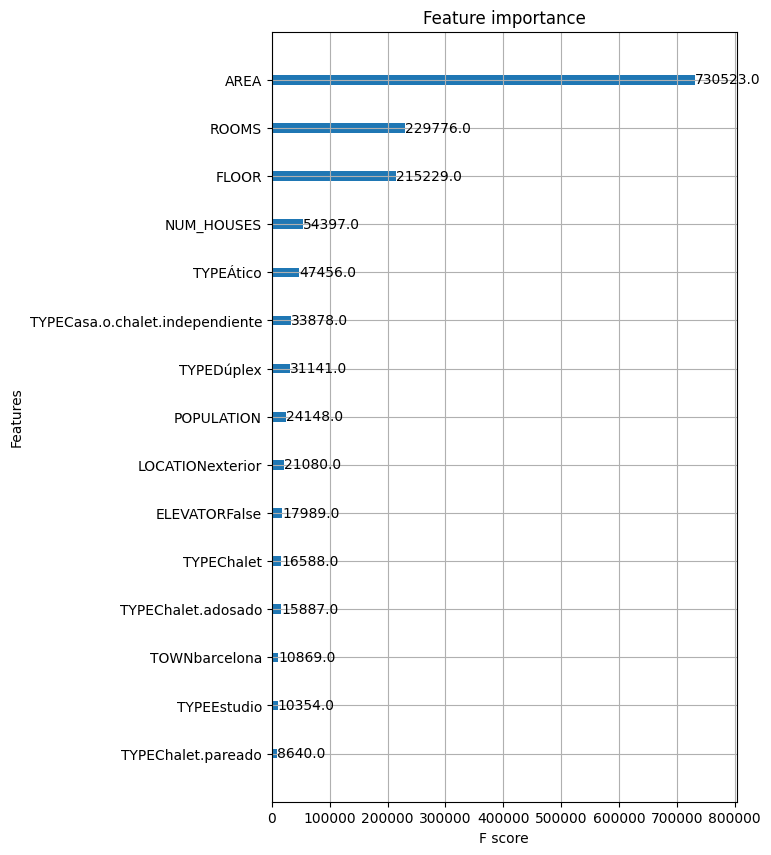

In [61]:
ax = xgboost.plot_importance(model_overfit,max_num_features=15, importance_type="weight")
fig = ax.figure
fig.set_size_inches(6, 10)

In [49]:
predictions_ = model_overfit.predict(sold_predicted.drop(['PROFITABILITY','RENT_PRICE','PRICE'],axis=1))

In [1]:
r2_score(predictions_, sold_predicted['PROFITABILITY'])

NameError: name 'r2_score' is not defined

In [ ]:
# MIrar correlaciones de variables con el precio. -> mirar sentido de la variable (es mejor invertir en pisos con + o - area?)
# Incluir flat rate del precio de suelo. Tambien coste fijo de tipo de casa

In [54]:
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['AREA']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['ROOMS']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['FLOOR']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['TYPECasa.o.chalet.independiente']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['GARAGEFALSE']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['NUM_HOUSES']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['ELEVATORFalse']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['LOCATIONexterior']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['TYPEÁtico']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['TYPEChalet']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['POPULATION']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['LOCATIONinterior']))


-0.19612059125880973
-0.1446516812901593
-0.006011945763633265
-0.0949634128193475
0.26847423324563163
-0.02493014125007018
0.19998296681485406
-0.05973056660605954
-0.06027575373344163
-0.014748913110056319
-0.03425435304632182
0.008825452802730557


In [65]:
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['TOWNvalencia']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['PROVINCEValencia']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['PROVINCEOurense']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['TOWNcrevillente']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['TYPEDúplex']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['TYPECortijo']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['TYPEMasía']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['TYPECasa.rústica']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['TYPECasa.terrera']))

-0.007006105298349091
0.11146104476107696
0.0013333079675499646
0.02967042237485725
-0.04417369377367251
-8.638100841133554e-05
-0.004737963216769779
-0.008535112229679289
0.017012180285511925


In [76]:
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['PROVINCEValencia']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['PROVINCEOurense']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['PROVINCEBizkaia']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['PROVINCELleida']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['PROVINCELeón']))

0.11146104476107696
0.0013333079675499646
-0.05789286864340677
0.02892115390135836
0.024471334052788247


In [89]:
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['TOWNmieres.del.camino']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['TOWNmurcia']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['TOWNchiclana.de.la.frontera']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['PROVINCEValencia']))
print()
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['TOWNpalma.de.mallorca']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['TOWNmarbella']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['TOWNbarcelona']))
print(sold_predicted['PROFITABILITY'].corr(sold_predicted['TOWNvalencia']))


0.07178543149203685
0.021084646347483596
0.04808119777190063
0.11146104476107696

-0.04103304746988169
-0.025921663833694233
-0.01844159034537012
-0.007006105298349091


In [90]:
print(sold_predicted['PRICE'].corr(sold_predicted['TOWNmieres.del.camino']))
print(sold_predicted['PRICE'].corr(sold_predicted['TOWNmurcia']))
print(sold_predicted['PRICE'].corr(sold_predicted['TOWNchiclana.de.la.frontera']))
print(sold_predicted['PRICE'].corr(sold_predicted['PROVINCEValencia']))
print()
print(sold_predicted['PRICE'].corr(sold_predicted['TOWNpalma.de.mallorca']))
print(sold_predicted['PRICE'].corr(sold_predicted['TOWNmarbella']))
print(sold_predicted['PRICE'].corr(sold_predicted['TOWNbarcelona']))
print(sold_predicted['PRICE'].corr(sold_predicted['TOWNvalencia']))

-0.01775041307525336
-0.03293598241041062
-0.010014625245542998
-0.05170302403029873

0.08216699593876298
0.23723871586034986
0.03368751442756525
-0.014633002334557546


In [60]:
correlations = sold_predicted.corrwith(sold_predicted['PROFITABILITY'])
#correlations = correlations.to_list()

In [61]:
correlations.sort_values()

PRICE                             -0.286457
AREA                              -0.196121
ROOMS                             -0.144652
TYPECasa.o.chalet.independiente   -0.094963
RENT_PRICE                        -0.090863
                                     ...   
TOWNontinyent                      0.088199
PROVINCEValencia                   0.111461
ELEVATORFalse                      0.199983
GARAGEFALSE                        0.268474
PROFITABILITY                      1.000000
Length: 562, dtype: float64